In [11]:
#로지스틱 회귀를 통한 와인 분류
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()
#wine.info()

#pandas -> numpy
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

#print(data)
#데이터 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

#표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print("훈련 세트 점수 : ", lr.score(train_scaled, train_target))     #0.7808350971714451
print("테스트 데이터 점수 : ", lr.score(test_scaled, test_target))    #0.7776923076923077

print("로지스틱 회귀 점수와 절편 출력 : ", lr.coef_, lr.intercept_)   #[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]

#즉, z = 도수 x 0.51270274 + 당도 x 1.6733911 + pH x -0.68767781 + 1.81777902

훈련 세트 점수 :  0.7808350971714451
테스트 데이터 점수 :  0.7776923076923077
로지스틱 회귀 점수와 절편 출력 :  [[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


0.996921300750433
0.8592307692307692


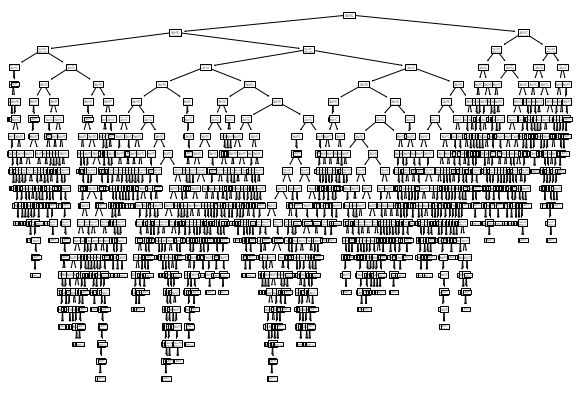

In [13]:
#결정 트리 활용
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))  #0.996921300750433
print(dt.score(test_scaled, test_target))    #0.8592307692307692 => 훈련 세드의 정확도가 낮으므로 과대적합

#그림으로 확인하기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

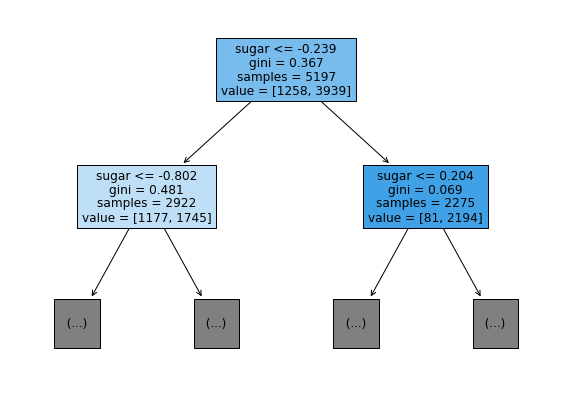

In [15]:
#자세히 확인해보자
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

#229 ~241 추후 하기